# imports

In [1]:
from trotter.hamsimtrotter import AlgorithmHamSimTrotter
from qDrift.hamsimqDrift import AlgorithmHamSimqDrift
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

# system parameters

In [2]:
def gen_sys_param():
    global t_max
    global n_trotter_steps
    global n_qdrift_steps
    global n_lcu_steps
    global precision
    global initial_state_circ
    global t
    global hamiltonian
    global hamiltonian_drift
    global coeff
    global measurements
    global hamiltonian_test

    t_max=20
    n_trotter_steps = 10
    n_qdrift_steps = 10
    n_lcu_steps = 10
    precision = 0.1
    initial_state_circ = Circuit(4)
    initial_state_circ.X(0)
    initial_state_circ.X(1)
    t = fresh_symbol("t")

    hamiltonian = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t,
            QubitPauliString(
                [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
                [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
            ): 0.4*t,
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2*t,
        }
    )

    hamiltonian_test = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t
        }
    )

    hamiltonian_drift = ['ZIII','YZXX','XXII']
    coeff = [0.1,0.4,0.2]

    measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

# Trotter cheat

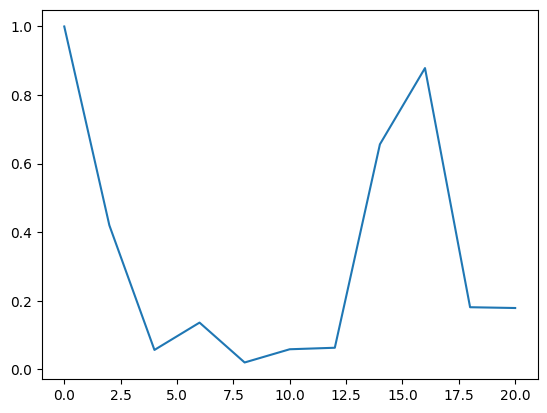

In [3]:
gen_sys_param()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(labels='continuous evolution')

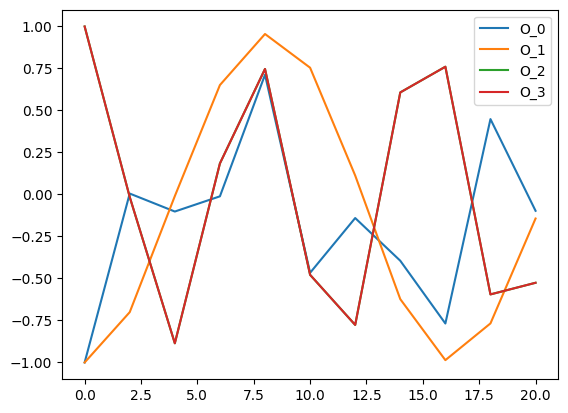

In [4]:
gen_sys_param()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(split=True,labels=['O_0','O_1','O_2','O_3'])

# Lie-Trotter

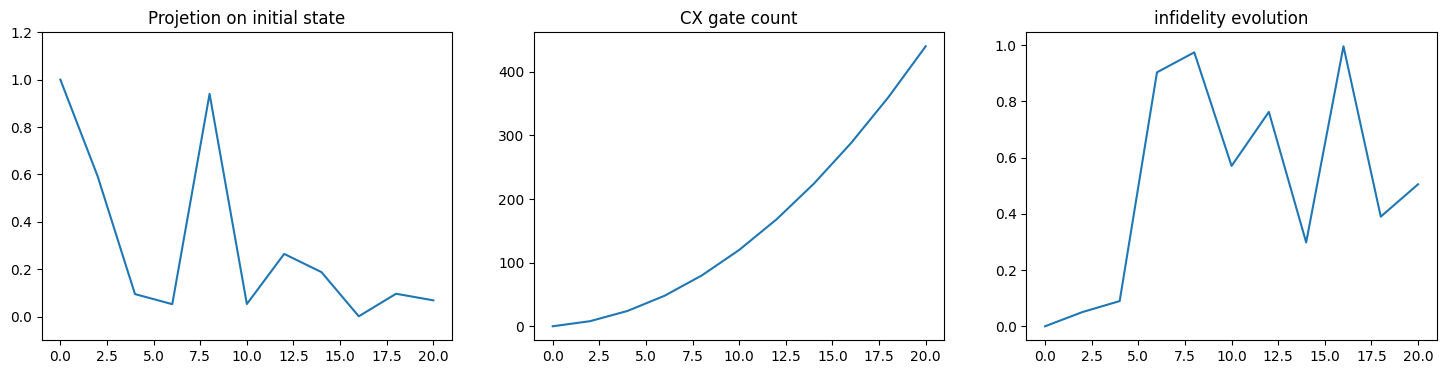

In [4]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], cheat=False)

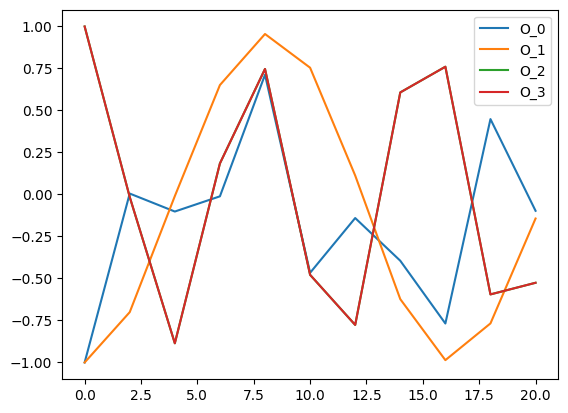

In [3]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(split=True,labels=['O_0','O_1','O_2','O_3'])

# second order trotter

[X q[0];, X q[1];]
[X q[0];, X q[1];, Rz(0.1) q[0];, Rz(0.333333) q[0];]
[X q[0];, X q[1];, Rz(0.1) q[0];, Rz(0.166667) q[0];, Rz(0.1) q[0];, Rz(0.166667) q[0];, Rz(0.1) q[0];, Rz(0.166667) q[0];]
[X q[0];, X q[1];, Rz(0.1) q[0];, Rz(0.111111) q[0];, Rz(0.1) q[0];, Rz(0.111111) q[0];, Rz(0.1) q[0];, Rz(0.111111) q[0];, Rz(0.1) q[0];, Rz(0.111111) q[0];, Rz(0.1) q[0];, Rz(0.111111) q[0];, Rz(0.1) q[0];, Rz(0.111111) q[0];]


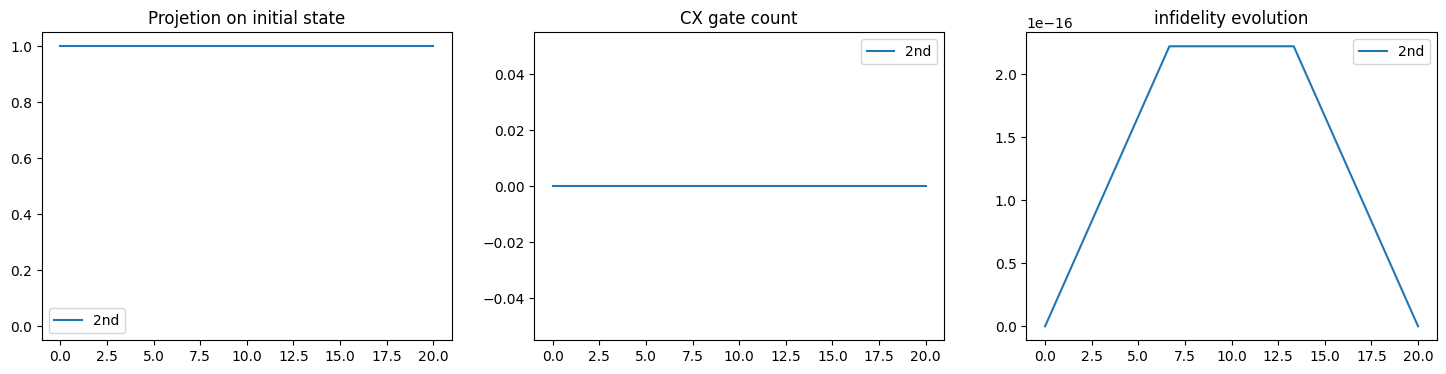

In [12]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian_test,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(labels=['2nd','2nd','2nd'], cheat=False)

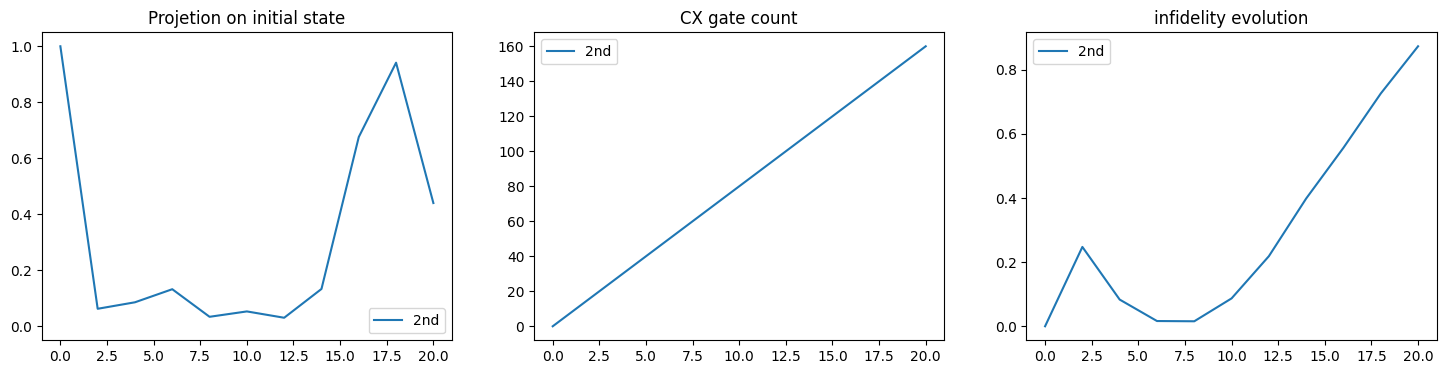

In [3]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(labels=['2nd','2nd','2nd'], cheat=False)

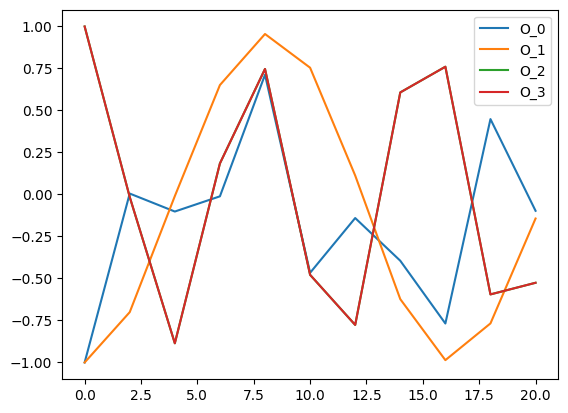

In [3]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(split=True,labels=['O_0','O_1','O_2','O_3'])

# higher order trotter

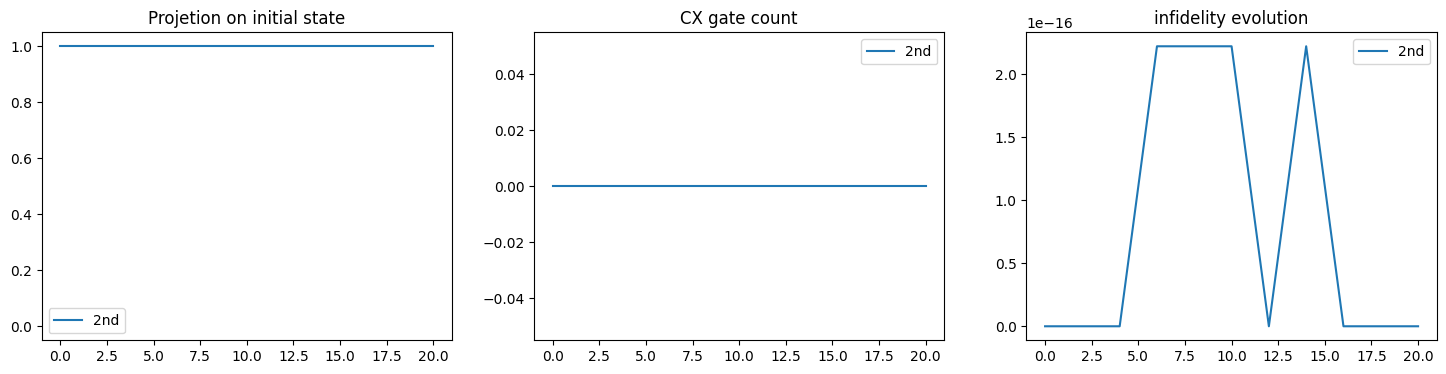

In [5]:
gen_sys_param()
trotter_time_evolution_high = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian_test,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_high.suzuki_trotter(2)
trotter_time_evolution_high.execute(labels=['2nd','2nd','2nd'], cheat=False)

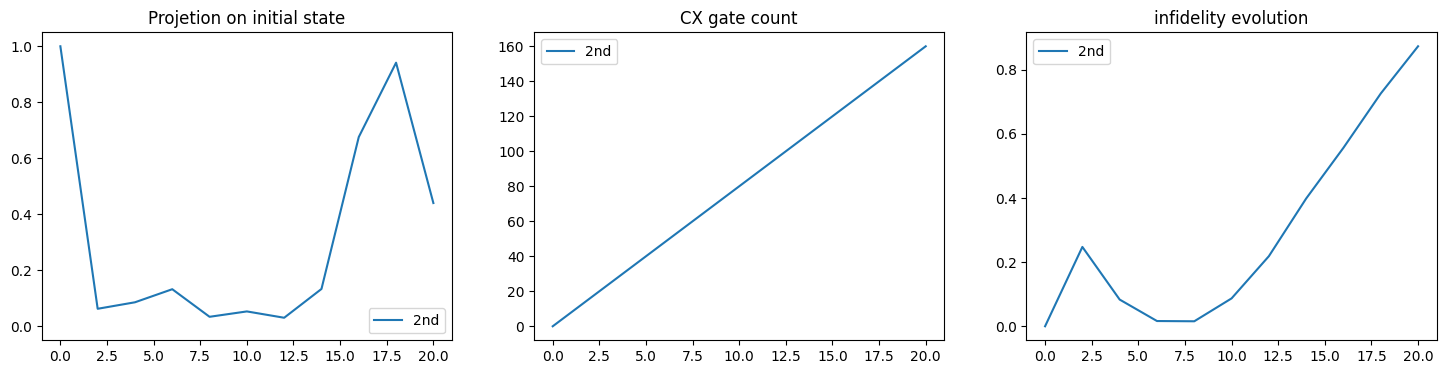

In [4]:
gen_sys_param()
trotter_time_evolution_high = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_high.suzuki_trotter(2)
trotter_time_evolution_high.execute(labels=['2nd','2nd','2nd'], cheat=False)

# Compare

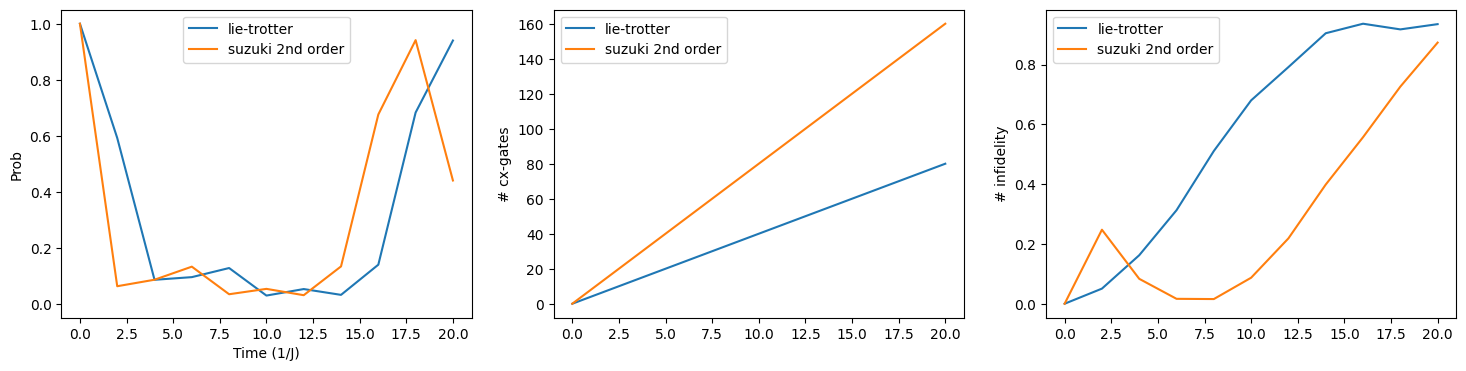

In [4]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expsl, gatesl, infidelitiesl, _ = trotter_time_evolution.lie_trotter(True)
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expss, gatess, infidelitiess, _ = trotter_time_evolution.second_order_suzuki_trotter(True)

trotter_time_evolution.compare([expsl,expss], [gatesl,gatess], [infidelitiesl, infidelitiess], ['lie-trotter', 'suzuki 2nd order'])

# TODO set gate comparison on the scale of same infidelity threshold value

# qDrift

40
157
353
628
980
1412
1921
2509
3176
3920


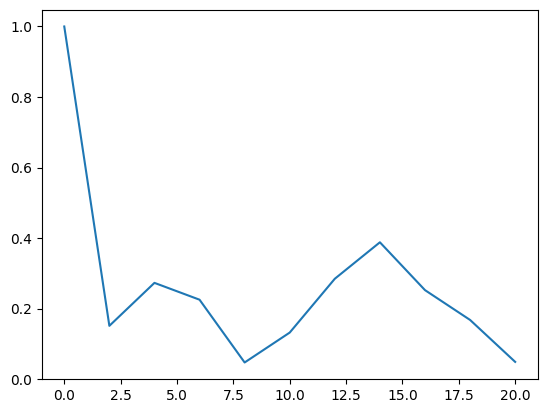

In [3]:
gen_sys_param()
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,hamiltonian_drift,coeff,measurements,t_max,n_qdrift_steps,precision)
drift_time_evolution.Drift_exp()
drift_time_evolution.execute()

# LCU

In [7]:
gen_sys_param()
lcu_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_lcu_steps,t)
exp, time = lcu_time_evolution.LCU(2)

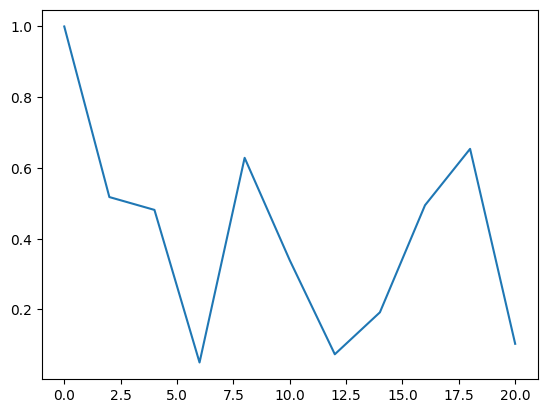

In [8]:
import matplotlib.pyplot as plt
plt.plot(time,exp)